## $\textit{In-situ}$ Actinometry 
Calibrate O($^1$D), O$_3$ and photon fluence 

Experiment on Jul 09 was used. (Run 1, 3)

In [1]:
import math
import numpy as np
import pandas as pd
# Cantera
import cantera as ct
from cantera.ck2cti import convertMech
import numpy as np 
import scipy.stats
import scipy.interpolate

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import mpld3
#mpld3.enable_notebook()
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True

In [2]:
# Import plotting modules and define plotting preference
%matplotlib notebook
import matplotlib.pylab as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)
# Get the best of both ggplot and seaborn
plt.style.use('ggplot')
plt.style.use('seaborn-deep')
plt.rcParams['figure.autolayout'] = True

In [3]:
## O3 absorption parameters at 253.65 nm and 266 nm
O3_XS_253= 1.173e-17  ## cm2/molecule
O3_XS_266= 9.52e-18   #cm2/molecule
L= 91.3              # cm
#Should be irrelevant of flow conditions as long as the cross section is correct

O$_3$ + h $\nu$ (266 nm) $\rightarrow$ O or O($^1$D) +O$_2$

One photon photolyze one O$_3$ atom! Photolyzation is caused by collision (cross section of molecule)

### $\Delta$ [O$_3$] [molec/cm$^3$] =  F[molec/cm$^2$]    $\quad \times \sigma$(O$_3$, 266 nm)[cm$^2$/molec]  $\quad \times$ [O$_3$] [molec/cm$^3$] 

While the latter part is related with O3 absorption (monitored by power meter at 248 nm)

$\sigma$(O$_3$, 266 nm)[cm$^2$/molec]  $\quad \times$ [O$_3$] [molec/cm$^3$] $\times$ L = Abs (O$_3$, 266 nm)

Therefore

k $\times$ Abs(PowerMeter) / L $\times$ F[molec/cm$^2$] = $\Delta$ [O$_3$] [molec/cm$^3$] 

k is a conversion factor

### Experimental Visualization

In [4]:
O3_cali_exp= pd.read_csv('O3_Calibration.csv')
O3_cali_exp.head()

,time_after_zero,after_zero,time_fitting,fitting,time_before_zero,before_zero,vertical_x,vertical_y
0,0.000053,0.327,0.000000e+00,0.337,-0.001000,0.48785,0.0,0.48380
1,0.000053,0.328,1.000000e-07,0.337,-0.001000,0.48813,0.0,0.33711
2,0.000053,0.328,2.000000e-07,0.337,-0.000999,0.48624,NaN,NaN
3,0.000053,0.328,3.000000e-07,0.337,-0.000999,0.48729,NaN,NaN
4,0.000054,0.329,4.000000e-07,0.337,-0.000999,0.48535,NaN,NaN


### Processing Method 1: Fitting Results  from MicroMaths Scientists

This is the method previously used in Chao's group. However, the software is not available for 64 bit PC.
We need to convert it to Python platform. 

In [5]:
model =  pd.read_excel('acti_new.xls')
model.head()

,TIME,SIGNAL,SIGNAL1,SIGNAL_CALC,SIGNAL_RESIDUALS
0,0.00000,0.0,0.0,0.000000,0.000000
1,0.00001,0.0,0.0,-0.145831,0.145831
2,0.00002,0.0,0.0,-0.148161,0.148161
3,0.00003,0.0,0.0,-0.150366,0.150366
4,0.00004,0.0,0.0,-0.152455,0.152455


<IPython.core.display.Javascript object>


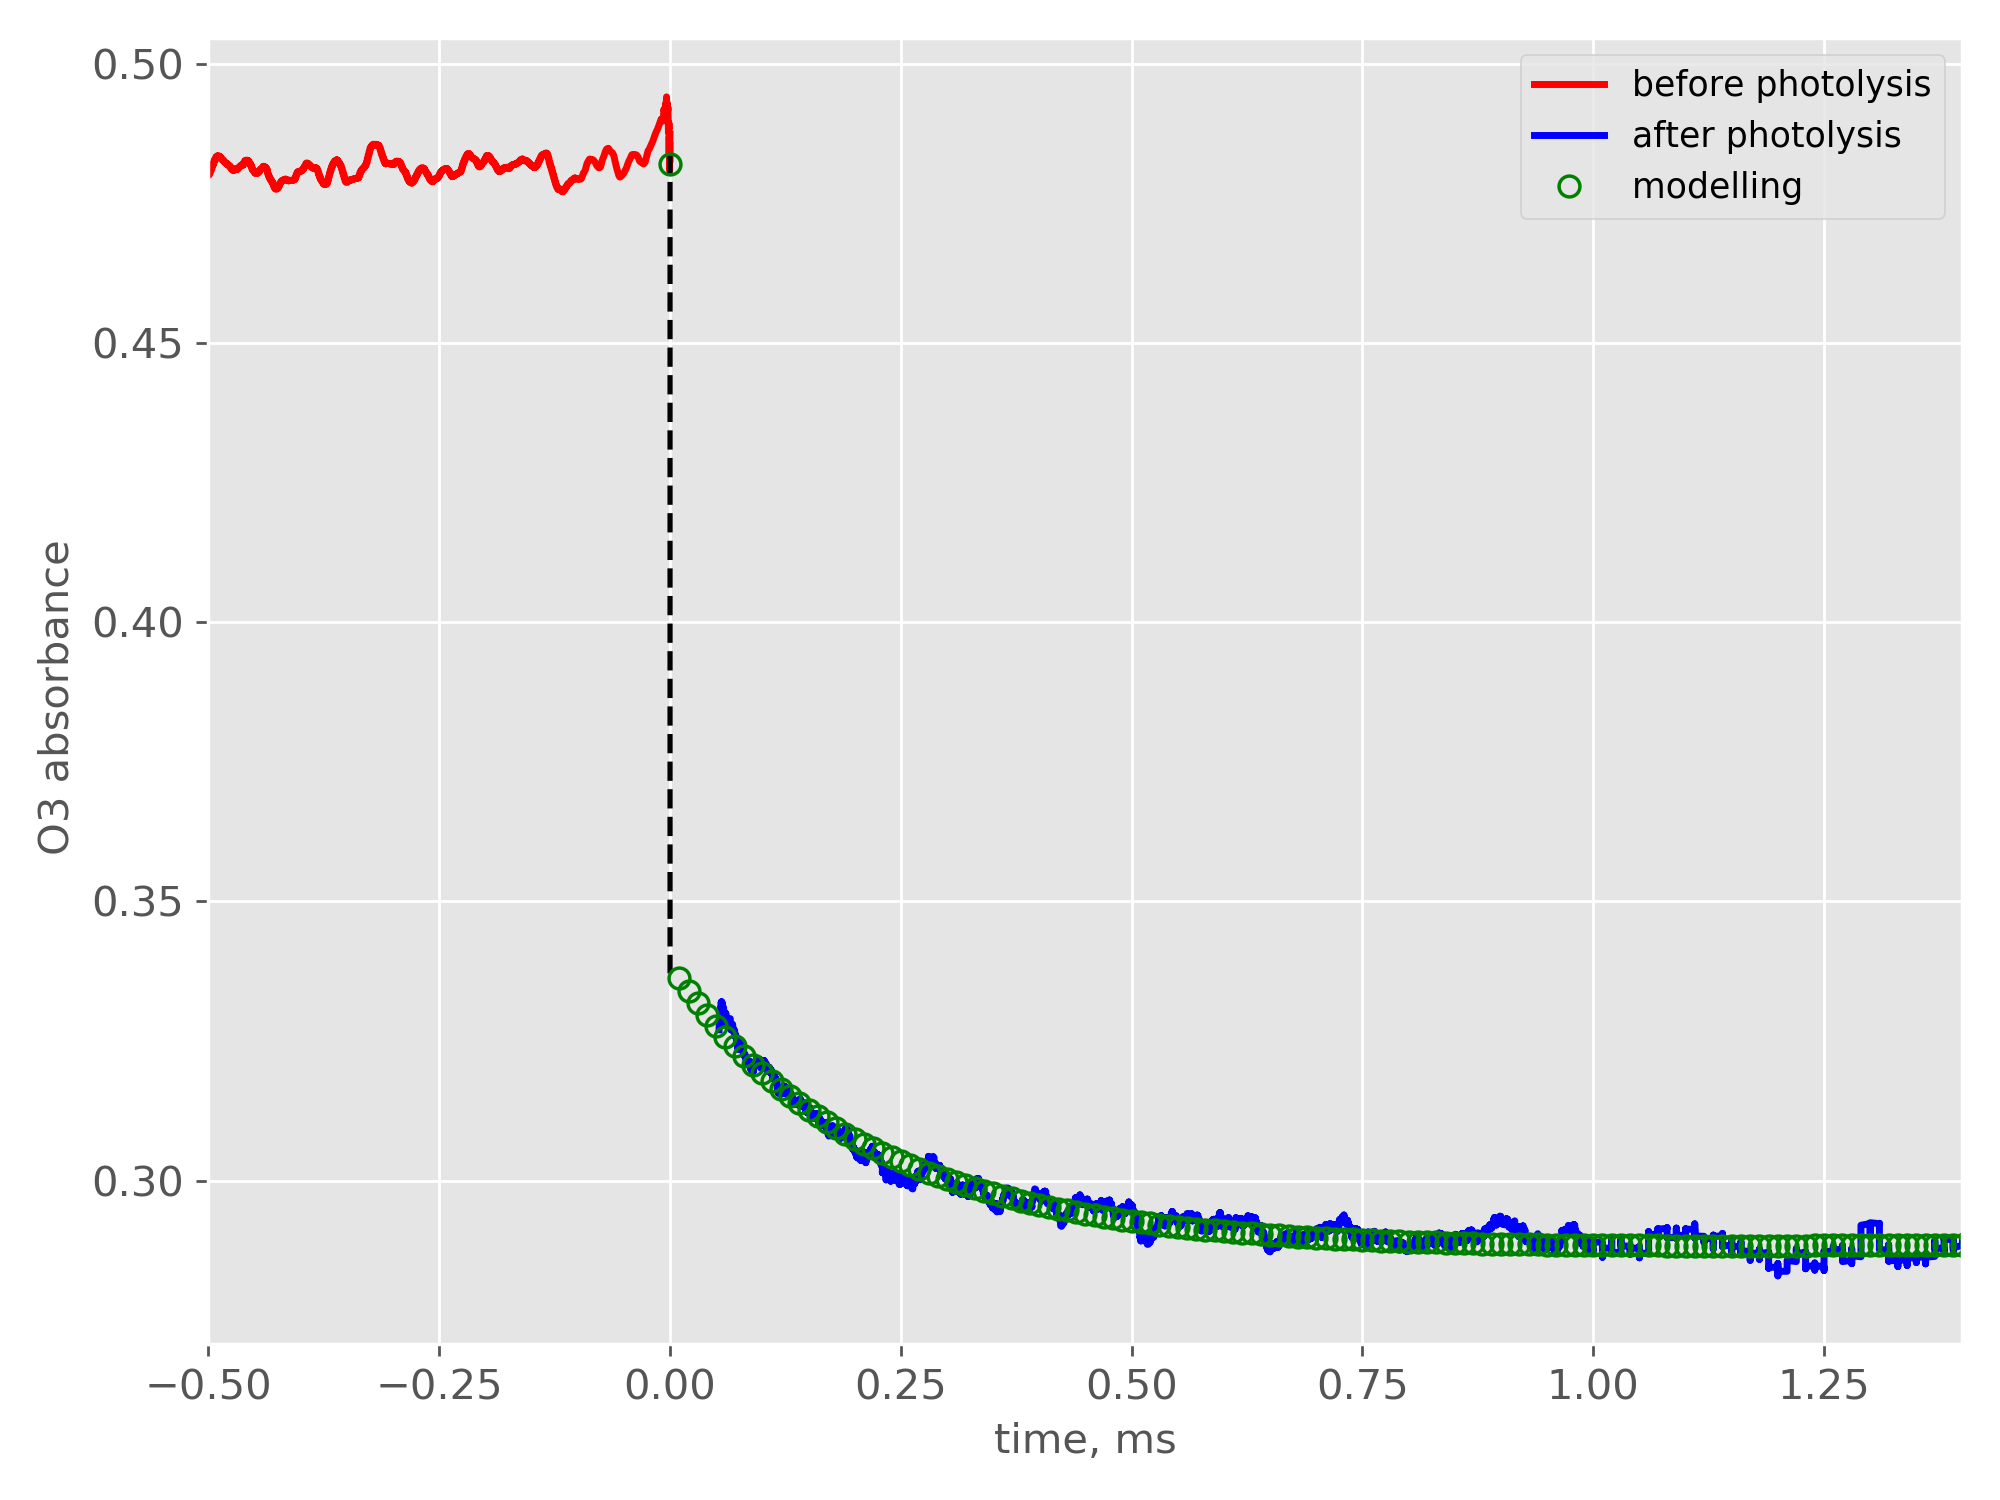

In [6]:
plt.plot(O3_cali_exp['time_before_zero']*1e3, O3_cali_exp['before_zero'], 'r-',markerfacecolor='none',linewidth = 2, label= 'before photolysis'     )
#plt.plot(O3_cali_exp['time_fitting'], O3_cali_exp['fitting'], linewidth = 5.0, color = 'b',ls='--', label= 'fitting'     )
plt.plot(O3_cali_exp['time_after_zero']*1e3, O3_cali_exp['after_zero'] ,'b-',linewidth = 2,label= 'after photolysis'     )
plt.plot(O3_cali_exp['vertical_x']*1e3, O3_cali_exp['vertical_y'], color = 'black', linestyle = '--')

plt.plot(model['TIME']*1e3, model['SIGNAL_CALC']+ np.mean(O3_cali_exp['before_zero']),'go',markerfacecolor='none', linewidth = 5, label= 'modelling ' )
plt.xlabel('time, ms')
plt.xlim([-5e-1, 14e-1])
plt.ylabel('O3 absorbance ')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


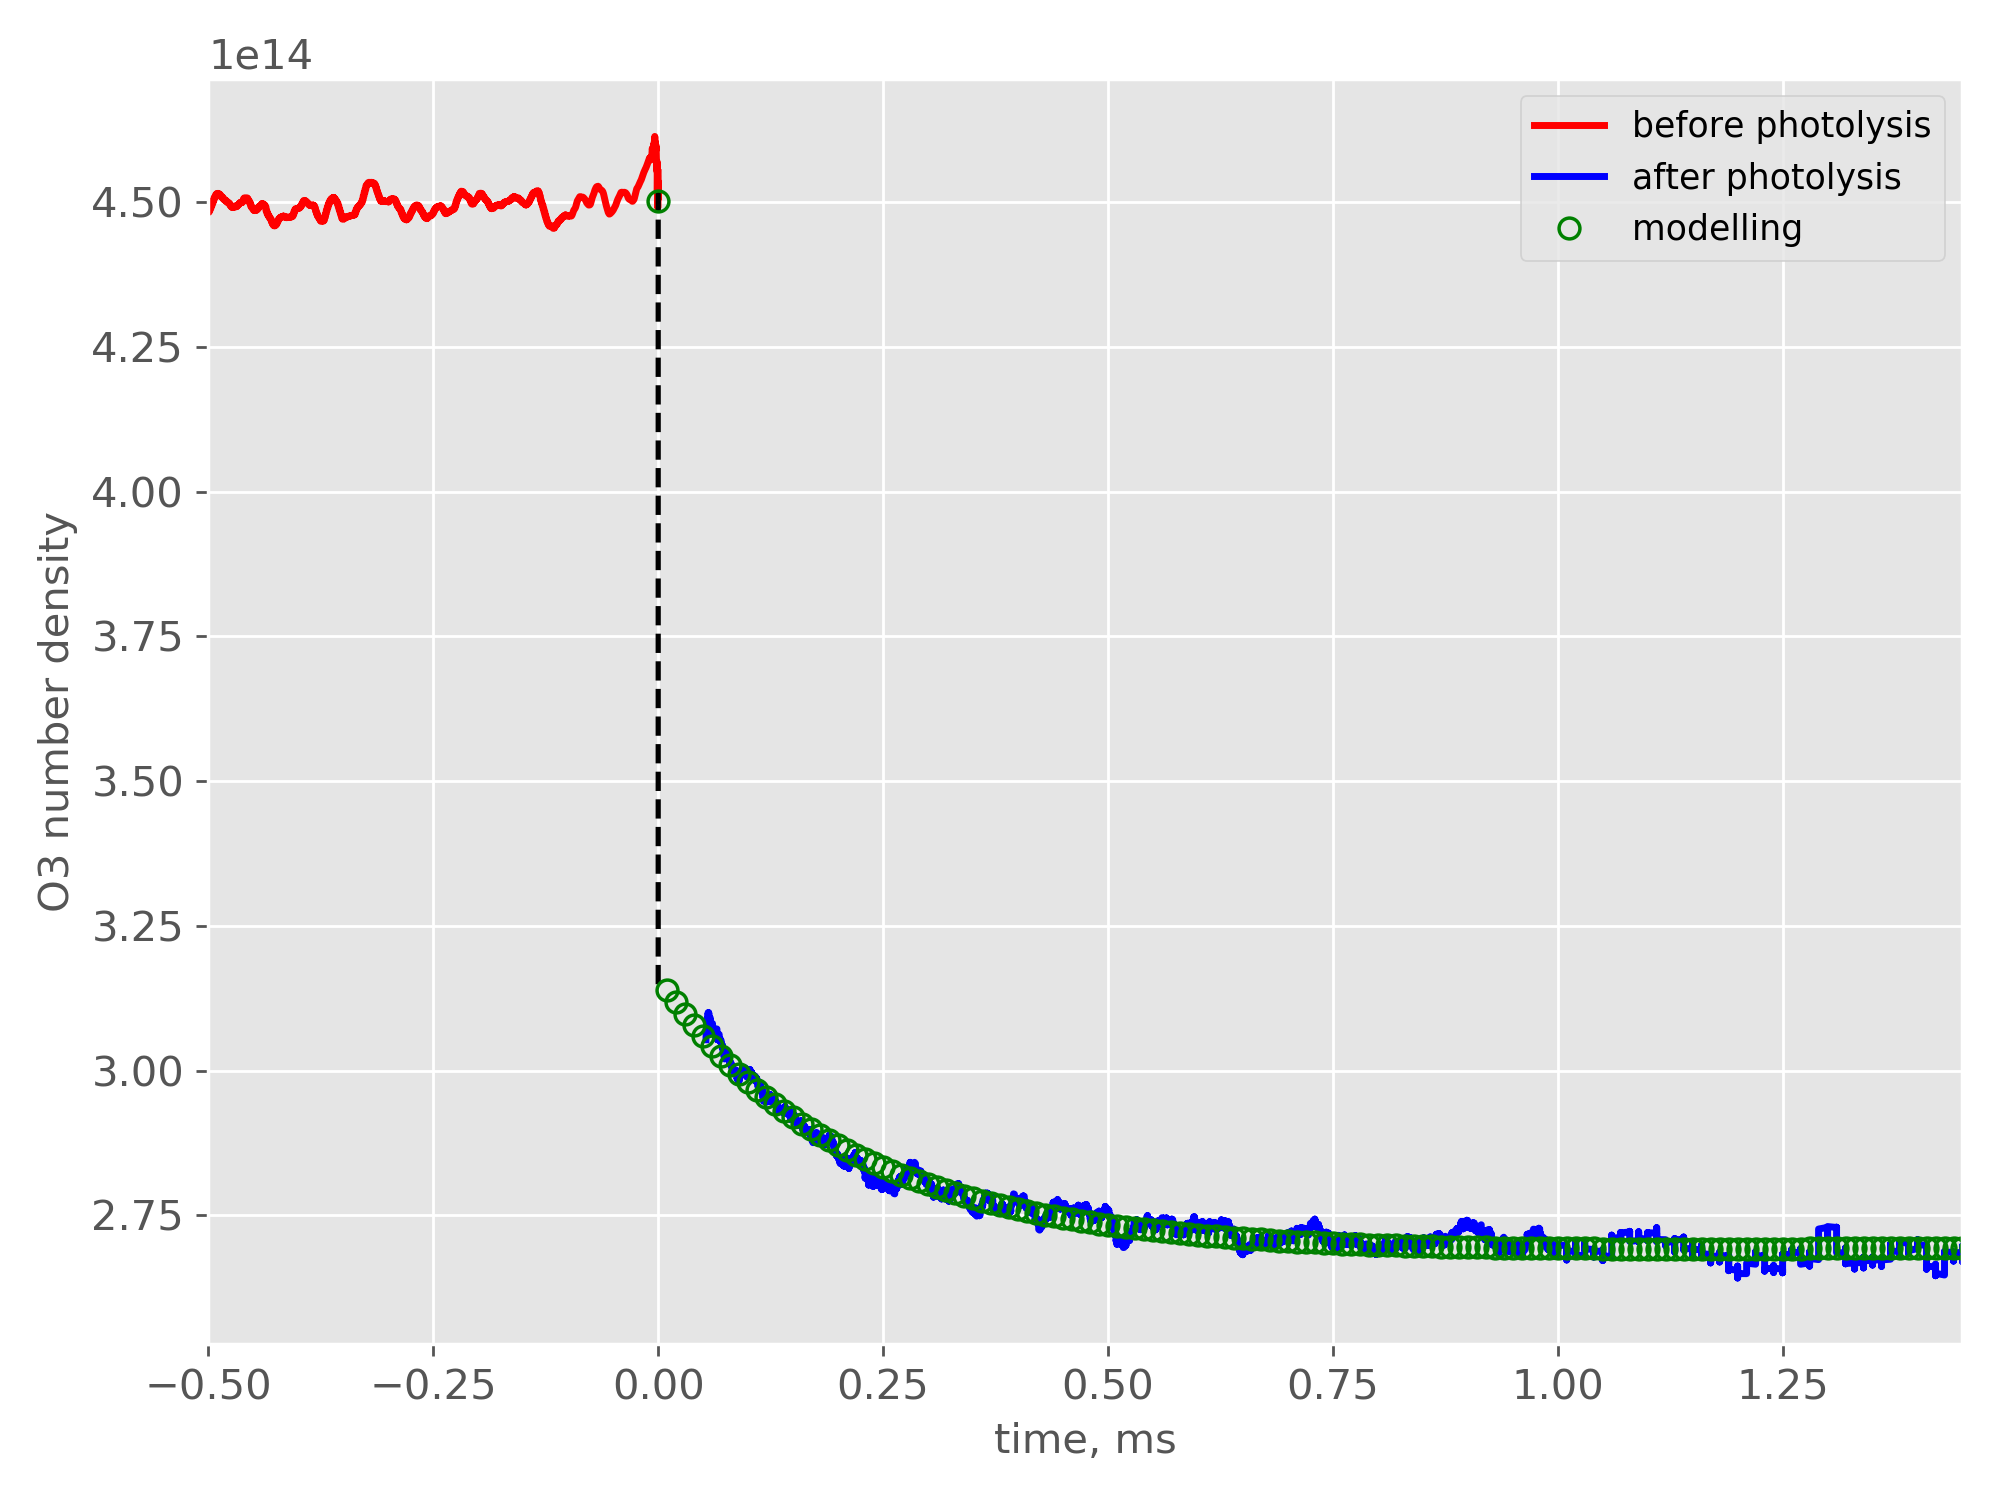

In [12]:
plt.plot(O3_cali_exp['time_before_zero']*1e3, O3_cali_exp['before_zero']/O3_XS_253/L  , 'r-',markerfacecolor='none',linewidth = 2, label= 'before photolysis'     )
plt.plot(O3_cali_exp['time_after_zero']*1e3, O3_cali_exp['after_zero']/O3_XS_253/L ,'b-',linewidth = 2,label= 'after photolysis'     )


plt.plot(O3_cali_exp['vertical_x'], O3_cali_exp['vertical_y']/O3_XS_253/L, color = 'black', linestyle = '--')

plt.plot(model['TIME']*1e3, (model['SIGNAL_CALC']+ np.mean(O3_cali_exp['before_zero']))/O3_XS_253/L,'go',markerfacecolor='none', linewidth = 2, label= 'modelling ' )
plt.xlabel('time, ms')
plt.xlim([-5e-1, 14.5e-1])
plt.ylabel('O3 number density')
plt.legend()
plt.show()

#### Photon Fluence from the model F= 2.4718e16 molec/cm3
#### Initial O3 drop to 3.16e14 molec/cm3

### Processing Method 2: Power Meter (Location should NEVER change )
O3_gen_pressure = 335.0 Torr

In [9]:
before_photolysis = 0.64943
at_photolysis = 0.75076   #right at photolysis
after_photolysis =  0.78881  
background =1.05173

In [10]:
mean_O3 = 15.6406
std_O3  = 0.98139
mean_no_O3 = 22.4029
std_no_O3 = 1.0405

In [17]:
O3_absorp = 4.5e14- 3.16e14  # molec/cm3
F= 2.4718e16   # photon fluence molec/cm3 from 

Power_meter = -math.log( (mean_O3) / (mean_no_O3 )  )/L # absoprtion1/cm
factor_k =  O3_absorp/F/Power_meter
print('calibration factor k', '%.4f'%factor_k)

Power_meter = -math.log( (mean_O3-std_O3) / (mean_no_O3 + std_no_O3)  )/L # absoprtion1/cm
factor_k =  O3_absorp/F/Power_meter
print('calibration factor k', '%.4f'%factor_k)

calibration factor k 1.3775
calibration factor k 1.0542


### Processing Method 3 O3 absorption data (from  oscilloscope )

In [8]:
O3  =           -math.log(before_photolysis/background)/O3_XS_253/L  #  original O3 molecule/cm3
O3_final =      -math.log(after_photolysis/background)/O3_XS_253/L   #  final O3 molecule/cm3
O3_photolysis = -math.log(at_photolysis/background)/O3_XS_253/L    #  right at O3 molecule/cm3

print('Initial O3 molecule/cm3', '%.4e'%O3)
print('right at the photolysis ', '%.4e'%O3_photolysis)
print('finally at the photolysis ', '%.4e'%O3_final)



O3_absorp = -math.log(before_photolysis/at_photolysis)/O3_XS_253/L  # molecule/cm3
O1D = O3_absorp * 0.9  # molecule/cm3

O3_O1D_conversion = O1D/O3
print('O3 absorption molecule/cm3', '%.4e'%O3_absorp)
print('O1D molecule/cm3', '%.4e'%O1D)
print('O3_O1D efficiency', '%.4f'%O3_O1D_conversion)

Initial O3 molecule/cm3 4.5016e+14
right at the photolysis  3.1477e+14
finally at the photolysis  2.6861e+14
O3 absorption molecule/cm3 1.3539e+14
O1D molecule/cm3 1.2185e+14
O3_O1D efficiency 0.2707


Assume O3 photolysis ($\Delta$ O3) to O($^1$D) efficiency is 0.9

### Photon Fluence

In [18]:
F=O3_absorp/O3_XS_266/O3 ## photon(molecule)/cm2
print('Photon Flux photon(molecule)/cm2', '%.4e'%F)

Photon Flux photon(molecule)/cm2 3.1268e+16


### Cantera_Modeling

In [22]:
#Define the gas system
gas = ct.Solution('O3\O3_Actinometry.cti')

# Cantera always uses SI units!
T= 296.0 
P = 60/760*101325

# Create an array to set the composition
X = np.zeros(gas.n_species)

In [25]:
X[gas.species_index ('HE')],X[gas.species_index ('O2')]= Flow_Condition_Calculation_O3( 0.1, 0.1, 60)

Corel for He 9.9929e-01
Corel for O2 1.0000e+00
L/mol at calibration 2.4557e+01 mol/L
                            
MFC_He 7.6681e-02 mol/min 1.8830e+00 Lpm
MFC_O2 8.0582e-04 mol/min 1.9788e-02 Lpm
cell area 1.9635e-03 m2
cell volume 1.7927e-03 m3
                            
cell pressure 60 Torr
total mole in the cell 5.8271e-03 mol
total flow in the cell 7.7487e-02 mol/min
total flow time 7.5201e-02 min, Yag laser frequency smaller than 2.2163e-01 Hz
n_O2 2.0350e+16 molec/cm3
n_He 1.9365e+18 molec/cm3


In [26]:
O3_O2= 4.5016e+14/2.0350e+16
print('O3_O2 ', O3_O2)

O3_O2 0.02212088452088452


### O3_O2 = 0.02212088452088452

### Below that are drafts!

In [21]:


# Number density, Two channels, molecule/cm3

X[gas.species_index ('O2')]= X[gas.species_index ('O2')]-O3* 1.5
X[gas.species_index ('O3')] = O3-O3_absorp     
X[gas.species_index ('O(SING)')] = O3_absorp*0.9
X[gas.species_index ('O')] =O3_absorp*0.1 

print ('%.4e'%X[gas.species_index ('HE')])
print ('%.4e'%X[gas.species_index ('O2')])
print ('%.4e'%X[gas.species_index ('O3')])
print ('%.4e'%X[gas.species_index ('O')])
print ('%.4e'%X[gas.species_index ('O(SING)')])

gas.TPX = T, P, X
gas()
# Define a ideal-gas-constant-pressure system
r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])
sim.verbose = True
dt_max = 1e-6
t_end = 1e-2
states = ct.SolutionArray(gas, extra=['t'])
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time)
    
# Post-processing
#plt.plot(states.t, O3_XS_253*L*  (P/T/1.38e-23/1e6)* states.X[:,gas.species_index('O3')], linewidth=5.0, label='sim', color= 'r')

#plt.xlabel('Time (s)')
#plt.legend()
#plt.xlim([-1e-3,4e-3])
#plt.show()

0.0000e+00
-6.7524e+14
3.1616e+14
1.3400e+13
1.2060e+14

  gas:

       temperature             296  K
          pressure         7999.34  Pa
           density         0.12505  kg/m^3
  mean mol. weight          38.473  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      5.8331e+06        2.244e+08     J
   internal energy      5.7691e+06         2.22e+08     J
           entropy          6274.6        2.414e+05     J/K
    Gibbs function      3.9758e+06         1.53e+08     J
 heat capacity c_p          878.79        3.381e+04     J/K
 heat capacity c_v          662.68         2.55e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                 O      0.0297673         0.012379          75.8212
           O(SING)       0.267906         0.111411          155.465
                O3       0.702327       

In [61]:
# Define a ideal-gas-constant-pressure system
r = ct.IdealGasConstPressureReactor(gas)
sim = ct.ReactorNet([r])
sim.verbose = True
dt_max = 1e-6
t_end = 1e-2
states = ct.SolutionArray(gas, extra=['t'])
while sim.time < t_end:
    sim.advance(sim.time + dt_max)
    states.append(r.thermo.state, t=sim.time)

Initializing reactor network.
Reactor 0: 72 variables.
              0 sensitivity params.
Number of equations: 72
Maximum time step:                0


In [62]:
T= 296.0 
P = 60/760*101325
print('total', P/T/1.38e-23/1e6)
print('He', 3.2167e-06*6.02214076e23)
print('O2', 3.3803e-08*6.02214076e23)
print('O 2 should be ',P/T/1.38e-23/1e6-1.9364534e+18 )

total 1.9583191601212193e+18
He 1.9371420182692e+18
O2 2.0356642411028e+16
O 2 should be  2.186576012121933e+16


<IPython.core.display.Javascript object>


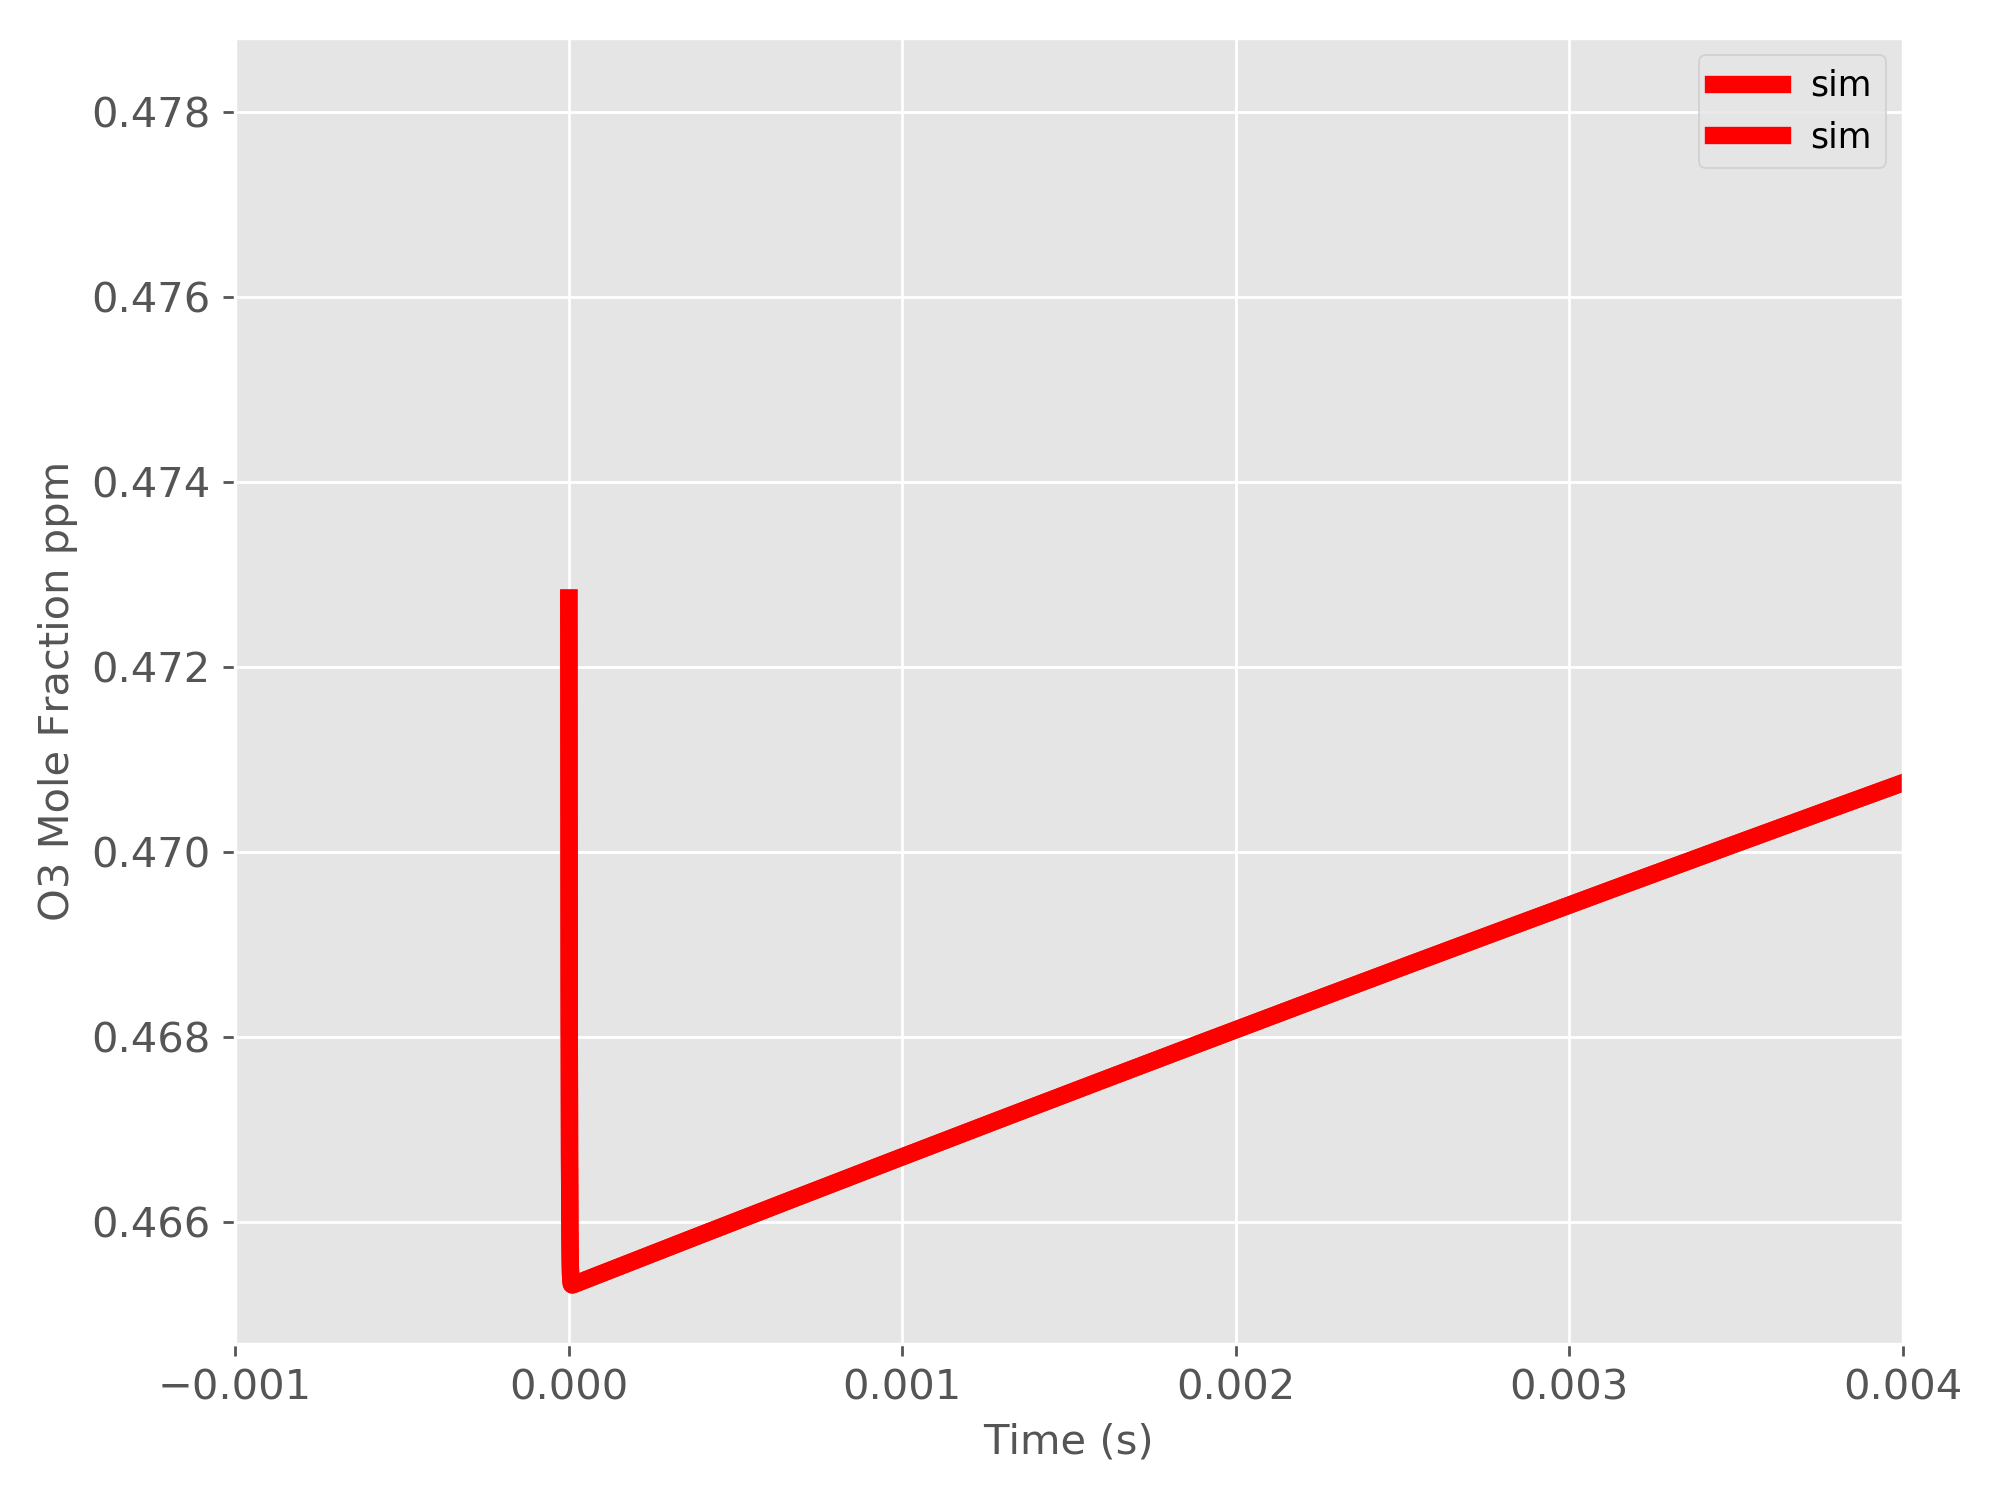

In [63]:
# Post-processing
plt.plot(states.t, O3_XS_253*L*  (P/T/1.38e-23/1e6)* states.X[:,gas.species_index('O3')], linewidth=5.0, label='sim', color= 'r')

plt.xlabel('Time (s)')
plt.ylabel('O3 Mole Fraction ppm')
plt.legend()
plt.xlim([-1e-3,4e-3])
plt.show()

In [31]:
time=np.arange(6e-5,4e-3, 1e-5)
signal=np.interp(time, O3_cali_exp['time_after_zero'], O3_cali_exp['after_zero'])
data_df = pd.DataFrame(time, signal)

writer = pd.ExcelWriter('Save_Excel.xlsx')
data_df.to_excel(writer,'page_1',float_format='%.5f') # float_format
writer.save()

### Kinetic Mech of O3-O2- He System

In [43]:
convertMech(
    inputFile='O3/O3_Actinometry.inp', 
    thermoFile='O3/therm.dat', 
    transportFile=None, 
    surfaceFile=None, 
    phaseName='gas', 
    outName=None, 
    quiet=False, 
    permissive=True);

INFO:root:Skipping unexpected species "HCL" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "NE" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C(S)" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CL" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "OH"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2*" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2OH"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3O"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2CO"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2CHO"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2OCH"OLD"" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2OCH" while reading thermodynamics entr

INFO:root:Skipping unexpected species "cC6H8" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "lC6H9" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "cC6H9" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "cC6H10" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C6H3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "i-C6H5" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "i-C6H7" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "o-C6H4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "m-C6H4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "p-C6H4" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "l-C6H4Z" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "nC6H5" while reading thermodynamics entry.
INFO:root

INFO:root:Skipping unexpected species "H2O(L)" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "DO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "HO2CHO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "O2CHO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "HOCH2O2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "HOCH2O2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "OCH2O2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "HOCH2OH" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH2O2H" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C2(S)" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3CO2H" while reading thermodynamics entry.
INFO:roo

INFO:root:Skipping unexpected species "H2CNO2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "H2CN" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3NO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3NO2" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "H2NO" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "HCN" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH*" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "C5H10-i" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "iC4H7" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3OCH3" while reading thermodynamics entry.
INFO:root:Skipping unexpected species "CH3OCH2" while reading thermodynamics entry.


Wrote CTI mechanism file to 'O3/O3_Actinometry.cti'.
Mechanism contains 70 species and 9 reactions.


In [24]:
def Flow_Condition_Calculation_O3( He_Set, O2_Set, PcellTorr):


############## Constant never change!!!
    R= 8.314                       # J/(K·mol)
    Cell_Length=0.913  ## m for cell length
    d= 0.05            ## reactor diameter, m
    Tcell = 296                # cell temp
    

############## Load Calibration Data
    cal=pd.read_csv('MFC_08_19.csv')  #Recent calibration on Aug 19, 2019
    r_He=scipy.stats.pearsonr(cal['He_SP'], cal['He_lpm'])[0]
    print('Corel for He', '%.4e'%r_He)
    r_O2=scipy.stats.pearsonr(cal['O2_SP'], cal['O2_lpm'])[0]
    print('Corel for O2', '%.4e'%r_O2)
        
    interp_He = scipy.interpolate.interp1d(cal['He_SP'], cal['He_lpm'],kind='linear' )
    interp_O2 = scipy.interpolate.interp1d(cal['O2_SP'], cal['O2_lpm'],kind='linear' )
    T_MFC = (76.2-32)*5/9 + 273.15 ## F to K measure temperautre
    P= 100792                      ## Pa
    V_n= P/R/T_MFC/1e3             # mol /liter
    print('L/mol at calibration','%.4e'%(1/V_n), 'mol/L')
  
    
############## MFC flow rate
    print('                            ')

    MFC_He=interp_He(He_Set)*V_n  # mol per minute
    print('MFC_He','%.4e'%MFC_He, 'mol/min','%.4e'%(MFC_He/V_n), 'Lpm' )         
    MFC_O2=interp_O2(O2_Set)*V_n  # mol per minute
    print('MFC_O2','%.4e'%MFC_O2,'mol/min','%.4e'%(MFC_O2/V_n), 'Lpm' )
    
############## Steady State Cell calculations
    S_Cell =0.25 *d*d*np.pi;       print('cell area', '%.4e'%S_Cell, 'm2')
    V_Cell = S_Cell *Cell_Length;  print('cell volume', '%.4e'%V_Cell, 'm3')
    Pcell =  PcellTorr/760*101325      ## Pa
    V_n= Pcell/R/Tcell/1e3                 # mol/liter
    n_total =V_n* V_Cell*1e3
    print('                            ')
    print('cell pressure', PcellTorr, 'Torr')
    print('total mole in the cell', '%.4e'%n_total, 'mol')
    n_flow =  MFC_He + MFC_O2 
    print('total flow in the cell', '%.4e'%n_flow, 'mol/min')
    t_flow = n_total/n_flow
    print('total flow time', '%.4e'%t_flow, 'min, Yag laser frequency smaller than', '%.4e'%(1/(t_flow*60)), 'Hz' )

############## Final Concentration

    n_O2   = MFC_O2 * t_flow /V_Cell/1e6  * 6.02e23                                # mol/cm3
    print('n_O2', '%.4e'%n_O2, 'molec/cm3')
    n_He  =   MFC_He * t_flow /V_Cell/1e6 * 6.02e23    # mol/cm3
    print('n_He', '%.4e'%n_He, 'molec/cm3')
    return n_He, n_O2

### Check the results  (we should choose the value right at the photolysis)

In [24]:
k=0.91797
F=2.868417545264144e+16

Power_meter = -math.log(mean_O3/mean_no_O3)/L

O3=k*Power_meter/O3_XS_266
print('O3', '%.4e'%O3)


# math.exp( 1)  #-O3*O3_XS_253*L
#print math.exp(before_photolysis/at_photolysis)

O1D= F*O3*O3_XS_266
print('O1D','%.4e'%O1D)

O3_absorp=O1D/0.9
print('O3_absorp','%.4e'%O3_absorp)


print(np.exp(-O3_absorp* O3_XS_253* L))
print(before_photolysis/at_photolysis)

O3 3.7949e+14
O1D 1.0363e+14
O3_absorp 1.1514e+14
0.8839871140281927
0.9247962065107358
